In [10]:
from src.models.modulated_siren import ModulatedSirenModel
from src.datasets.chairs import get_mgrid
import torch

In [11]:
from src.models.modulated_siren import ModulatedSirenModel
import pytorch_lightning as pl

# Create an instance of the ModulatedSirenModel
model = ModulatedSirenModel(in_features=2, hidden_features=256, hidden_layers=10, modulation_size=256, out_features=3, outermost_linear=True, first_omega_0=30, hidden_omega_0=30.)
dim = 128
representation_dim = 512
modulation_size = 256
hidden_features = 512
hidden_layers = 15
# Load the checkpoint
checkpoint_path = "/home/arkadi.piven/Code/functa/checkpoints/meta_learning_canonical_chairs_one_angle_hidden_layers_15_modsize_256_dim_128_multistep_lr_3e-6_hidden_features_512/last.ckpt"
model = model.load_from_checkpoint(checkpoint_path, in_features=2, hidden_features=hidden_features, hidden_layers=hidden_layers, modulation_size=modulation_size, out_features=3, outermost_linear=True, first_omega_0=30, hidden_omega_0=30.)

LR IS 3e-06


LR IS 3e-06


Chairs dataset initialized
['292621234cdb42969c76680ce8100088', '768843209e734d569d1b527c1f3511a1', '66624c84a4d94559b35914ee2ada4c4b', 'a9328e057fe049ff8b0c35489e0dfb8d', '607a3bf3fbc54bd2b9da08c18f625ee4', '039c6026571943d6ac45c6816bcc7ff1', '4c302192035d40e59b7c0f18bb74f212', 'd2d5000b1e7a4d9a8a4a637267418061', '0f7366550f694e1cb9efddea214a3c33', '9f7890238c4442d789d1970cead93203', '3efb9e42f49f47c6bd1d36f86281888b', '9d53c4f8a4394a9ca333da20138cd897', '79c0f5d111324264b4c6fea9402df88e', '03f16302c1a54c46b438dac78e9d7048', '64b170e4864549c382b6c94c529203d7', '2820827abdcd4e79b7c67683292416aa', '934b7b5515da4720b0af2764924aad3a', '053039b95c314104b5fe0dfb19f43cb3', '43c8828e83124e1e90e85c9e57b404c8', '2ec01ec1eb874f6fb11ef732fb575267', '392e2810e1e24b02b2fdbc1dd3f21064', 'fab9443d48e24fbfa309187df78d58e6', '0edcc9053a114e7f8a706cae0864e7be', 'b10ee58a01b649d381598d899850176c', '15b2ebce6f084c3ea8d582c168ff478e', 'ddd35916c5d84fd8ab4c38380a73fb5b', '28d004c0d320423d89b6b4421c23df2f', 

tensor([[0.0011, 0.0011, 0.0009],
        [0.0010, 0.0011, 0.0009],
        [0.0010, 0.0011, 0.0009],
        ...,
        [0.0010, 0.0010, 0.0008],
        [0.0010, 0.0010, 0.0008],
        [0.0010, 0.0010, 0.0008]], grad_fn=<AddBackward0>)


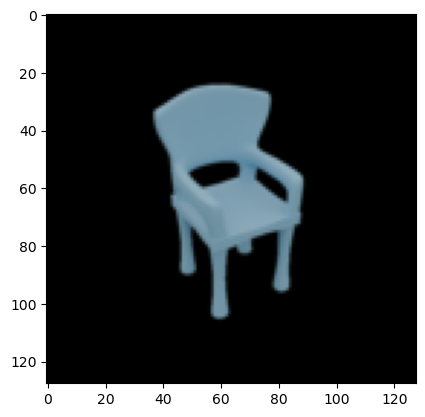

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from src.datamodules.chairs_datamodule import ChairsDatamodule
import torchvision. transforms as T
from PIL import Image

# Define the grid
chairs = ChairsDatamodule(path="/home/arkadi.piven/Code/functa/rendered/chair", dim=dim, batch_size=1)
transform = T.ToPILImage()
coords, pixels = chairs.train_dataset[27]
print(chairs.train_dataset.get_chair_name_by_idx(6))
coords = get_mgrid(representation_dim, 2)
print(pixels)
pixels = pixels * 0.5 + 0.5
# # Pass the coordinates through the model
model.phi.data = torch.zeros(modulation_size)
output = model(coords)
output = output * 0.5 + 0.5
print(output)


# Reshape the output to (512, 512, 3)
# print(output.shape)

# # Plot the image

plt.imshow(pixels.view(dim,dim,3).detach().numpy())

# plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


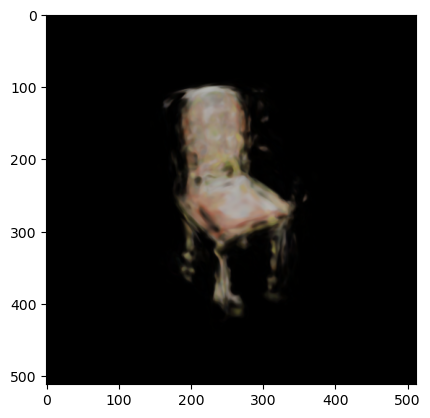

In [13]:
# Output base weights
plt.imshow(output.view(representation_dim,representation_dim,3).detach().numpy())

## Train latent and visualize

BEGIN OF TRAINING PHI Parameter containing:
tensor([-2.0327e-03,  2.2918e-03,  1.6944e-03,  4.9416e-05,  2.4552e-03,
         3.5539e-03, -1.3424e-03, -4.7475e-03, -1.2097e-03, -7.0670e-04,
        -3.3954e-03, -1.2965e-03,  5.4209e-03, -2.1168e-03, -2.1706e-03,
        -5.2769e-04,  1.7582e-04, -5.4336e-03,  1.9414e-03,  1.5950e-03,
        -2.0036e-04, -3.5320e-03,  1.1447e-03,  2.7310e-03, -1.0177e-03,
        -2.7803e-03, -5.4981e-04,  8.8179e-04, -2.3099e-03, -1.4209e-03,
        -5.9034e-04, -4.4586e-03,  1.3983e-05,  6.8271e-04, -2.6063e-03,
         3.0097e-03,  1.8133e-03, -2.5253e-03, -1.4813e-03,  2.8333e-03,
        -1.1201e-03, -5.6032e-03, -3.7393e-04,  1.3518e-03,  5.1520e-04,
         1.4780e-03, -7.0054e-04, -3.7646e-04, -4.8922e-03, -5.1849e-03,
        -2.0568e-03,  9.5872e-04, -5.0776e-03, -1.7200e-03,  3.2408e-04,
        -3.4581e-04, -4.5416e-04, -1.2775e-03, -3.9353e-03, -6.9337e-04,
        -1.8161e-03,  8.7671e-04, -1.5627e-03, -4.8744e-04,  1.6806e-03,
       

  0%|          | 0/3 [00:00<?, ?it/s]

START PHI: Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.,

 33%|███▎      | 1/3 [00:03<00:06,  3.09s/it]

END PHI: Parameter containing:
tensor([ 1.5594e-03, -1.7893e-04,  4.8710e-04, -3.8201e-04, -2.4207e-03,
        -2.9042e-04, -4.4107e-03,  1.0079e-03,  5.2690e-04, -1.9942e-03,
         5.5854e-04, -3.3654e-03,  5.8793e-04, -1.3161e-03,  3.1096e-03,
        -5.4452e-04,  1.9594e-03,  1.6465e-03, -8.3025e-04,  2.5625e-03,
         2.6219e-03, -1.3103e-03,  3.6188e-03,  2.2476e-03,  1.9783e-04,
         3.3220e-04,  1.0222e-03, -1.4112e-03,  1.7483e-03, -2.4223e-03,
        -1.0250e-03,  2.7067e-04, -1.4078e-03, -1.2792e-03, -2.8792e-03,
         1.9621e-03, -8.1752e-04, -3.1728e-04,  3.3706e-04,  1.9900e-03,
         1.1988e-03, -3.1081e-04,  7.7154e-04, -1.6336e-06, -1.4299e-03,
        -1.2067e-05,  2.2100e-03, -1.5725e-03,  2.2267e-04,  2.2650e-03,
         5.6949e-04, -6.8947e-04,  2.2168e-04, -1.1817e-03, -1.4779e-03,
         9.5772e-04,  1.3712e-03, -2.1885e-03,  1.5041e-03,  7.9693e-04,
         3.1328e-03, -1.3313e-03, -2.6506e-03,  1.4158e-03, -2.0935e-03,
        -5.7899e-04,

 67%|██████▋   | 2/3 [00:06<00:03,  3.45s/it]

END PHI: Parameter containing:
tensor([ 2.2952e-03,  1.6341e-04,  7.8989e-03,  2.1831e-03, -3.6473e-03,
         1.4353e-03, -5.5296e-03, -6.1875e-03,  5.4956e-03, -1.9306e-03,
         1.8918e-03, -5.4762e-03,  4.6245e-03, -1.2117e-03,  7.3968e-03,
        -1.1413e-03, -1.6295e-03, -5.1165e-04,  2.1456e-03,  4.0574e-03,
         2.9757e-03, -4.8353e-03,  7.7420e-03,  8.9841e-03, -2.8415e-03,
         1.8020e-06,  3.5273e-03, -3.8311e-03,  3.9770e-03, -6.1634e-03,
        -5.8934e-03,  6.0879e-03,  1.3378e-03, -3.8949e-04, -3.7548e-03,
         3.5706e-03,  1.0811e-04,  5.1089e-03,  1.8257e-03,  1.7954e-03,
        -6.8897e-04, -1.5428e-03, -9.7316e-04, -2.4545e-04, -4.6021e-03,
         2.5788e-03,  1.9832e-03, -3.2035e-03,  7.8371e-04,  7.8153e-03,
        -2.7508e-03, -1.2251e-03, -5.1010e-03, -1.4807e-03, -1.8304e-03,
         2.9259e-03, -5.0906e-04, -3.7915e-04,  7.3895e-05, -1.3980e-03,
         1.9120e-03, -6.6751e-03, -2.4673e-03,  1.3200e-03, -5.3296e-03,
         1.7520e-03,

100%|██████████| 3/3 [00:09<00:00,  3.32s/it]

END PHI: Parameter containing:
tensor([ 1.5493e-03, -4.3046e-04,  6.9599e-03,  9.3663e-04, -3.2805e-03,
         1.6025e-03, -5.5211e-03, -7.0381e-03,  6.2887e-03, -2.4452e-03,
         1.8831e-03, -5.1589e-03,  5.0156e-03, -9.1657e-04,  6.4644e-03,
        -1.6976e-03, -1.5548e-03, -1.5392e-03,  1.1528e-03,  4.1224e-03,
         3.3697e-03, -4.8227e-03,  8.7928e-03,  8.7074e-03, -1.9220e-03,
         2.1333e-04,  3.4859e-03, -2.7625e-03,  4.0777e-03, -5.8422e-03,
        -5.7618e-03,  5.9182e-03,  1.0179e-03, -9.9284e-04, -3.9455e-03,
         3.6028e-03, -1.1672e-04,  3.4947e-03,  1.5453e-03,  1.5298e-03,
        -2.9476e-04, -2.4633e-03, -5.7224e-04, -5.8309e-04, -4.7759e-03,
         2.2723e-03,  2.1966e-03, -2.7522e-03,  4.5268e-04,  7.0487e-03,
        -2.2875e-03, -9.6118e-04, -4.3905e-03, -1.4931e-03, -1.9735e-03,
         3.5303e-03, -1.9820e-03, -1.3737e-03,  3.6216e-04, -1.5844e-03,
         1.2334e-03, -5.7614e-03, -2.1056e-03,  8.1932e-04, -4.7377e-03,
         1.3218e-03,


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[0.0013, 0.0014, 0.0009],
        [0.0013, 0.0014, 0.0008],
        [0.0013, 0.0014, 0.0008],
        ...,
        [0.0011, 0.0010, 0.0004],
        [0.0011, 0.0010, 0.0004],
        [0.0010, 0.0010, 0.0003]], grad_fn=<AddBackward0>)
torch.Size([262144, 3])


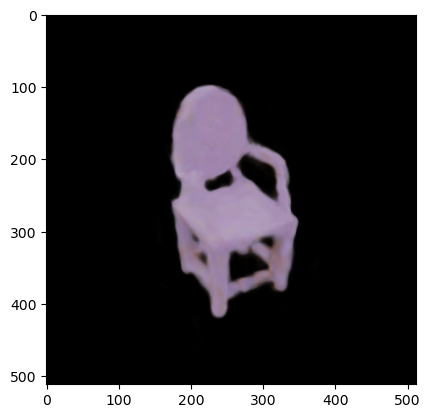

In [16]:
batch = chairs.train_dataset[6]
print(f"BEGIN OF TRAINING PHI {model.phi}")
model.train_latent(batch)
# model.train_latent((coords, pixels))
print(f"END OF TRAINING PHI {model.phi}")
coords = get_mgrid(representation_dim, 2)

output = model(coords)
output = output * 0.5 + 0.5
print(output)

print(output.shape)

# Plot the image
plt.imshow(output.view(representation_dim, representation_dim, 3).detach().numpy())

plt.show()
